In [54]:
import pandas
import matplotlib
import sys
from random import random
from operator import add
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession, SQLContext

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [55]:
orders=spark.read.load("hdfs://192.168.33.40:54310/orders/boston/warehouse")
orders.createOrReplaceTempView("bostonorders")
values=spark.sql("select * from bostonorders")
print(values.groupBy('productId').count().toJSON().collect())

[u'{"productId":"79169ffe-30e0-11e7-bf3b-9801a798fc8f","count":7}', u'{"productId":"7916b318-30e0-11e7-ac7a-9801a798fc8f","count":11}', u'{"productId":"79140276-30e0-11e7-9c4c-9801a798fc8f","count":5}', u'{"productId":"79174b3e-30e0-11e7-a9eb-9801a798fc8f","count":8}', u'{"productId":"79161a98-30e0-11e7-b4e8-9801a798fc8f","count":5}', u'{"productId":"79178130-30e0-11e7-8258-9801a798fc8f","count":7}', u'{"productId":"7915d7f4-30e0-11e7-a752-9801a798fc8f","count":12}', u'{"productId":"79166548-30e0-11e7-9285-9801a798fc8f","count":8}', u'{"productId":"7915bf58-30e0-11e7-b2b6-9801a798fc8f","count":7}', u'{"productId":"791605a8-30e0-11e7-b577-9801a798fc8f","count":8}', u'{"productId":"7916c57e-30e0-11e7-8d97-9801a798fc8f","count":4}', u'{"productId":"7917b4c0-30e0-11e7-80f0-9801a798fc8f","count":6}', u'{"productId":"79176fec-30e0-11e7-84e4-9801a798fc8f","count":7}', u'{"productId":"79173874-30e0-11e7-b64d-9801a798fc8f","count":8}', u'{"productId":"7917a44c-30e0-11e7-89fd-9801a798fc8f","coun

In [56]:
pandas=values.toPandas()
pandas.count()

event              235
id                 235
created              0
customerId         235
productId          235
productQuantity    235
dtype: int64

In [69]:
plt.figure()
p=values.groupBy('productId').count().toPandas()
p

,productId,count
0,79169ffe-30e0-11e7-bf3b-9801a798fc8f,7
1,7916b318-30e0-11e7-ac7a-9801a798fc8f,11
2,79140276-30e0-11e7-9c4c-9801a798fc8f,5
3,79174b3e-30e0-11e7-a9eb-9801a798fc8f,8
4,79161a98-30e0-11e7-b4e8-9801a798fc8f,5
5,79178130-30e0-11e7-8258-9801a798fc8f,7
6,7915d7f4-30e0-11e7-a752-9801a798fc8f,12
7,79166548-30e0-11e7-9285-9801a798fc8f,8
8,7915bf58-30e0-11e7-b2b6-9801a798fc8f,7
9,791605a8-30e0-11e7-b577-9801a798fc8f,8


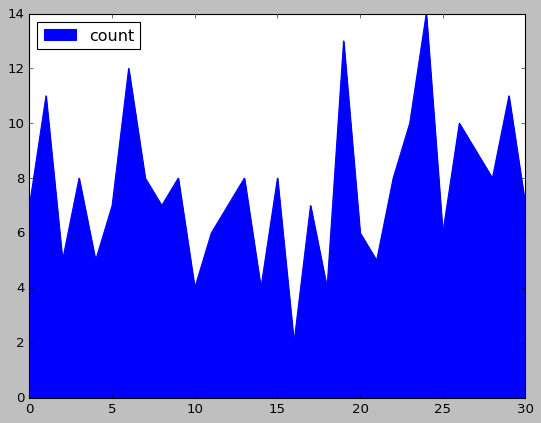

In [76]:
p.plot(kind='area')
plt.show()